# ECS7024 Statistics for Artificial Intelligence and Data Science 

This notebook aims to analyse the Texas bridge dataset and to use regression modelling to predict current condition of the data using continuous and categorical predictors.

The libraries used for this coursework are Numpy, Pandas, Matplotlib, Seaborn and Scikit learn. 

#### Part 1. Data preparation 
1. Importing the dataset into pandas 
2. Creating a new dataframe with the predictor variables and label. 
3. Derivation of new variables to reduce redundancy in the data (age, condition). 
4. Dropping historic bridges from the dataset by identifying the outliers. 

#### Part 2. Exploratory analysis
1. Visualising relationship amongst continuous predictor variables.
2. Visualising relationships amongst the categorical predictor variables using boxplots.

#### Part 3. Regression Modelling
1. Splitting the dataset into predictor variable X and label y.
2. Fitting the model into Linear regression model
3. Calculation of R^2 score.
4. Plotting residual distribution for the model. 


## Part 1: Data preparation

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

%matplotlib inline

In [2]:
df = pd.read_csv('tx19_bridges_sample.csv')
df

,Structure_id,District,Detour_Km,Toll,Maintainer,Urban,Status,Year,Lanes_on,Lanes_under,...,Spans,Length,Width,Deck_rating,Superstr_rating,Substr_rating,Rated_load,Trucks_percent,Scour_rating,Future_traffic
0,000021521-00101,District2,199,Free,Agency,Rural,Local,2005,1,0,...,2,31.4,4.3,Good,Very Good,Very Good,41.7,0.0,Dry,1
1,000021521-00181,District2,199,Free,Agency,Rural,Local,2005,1,0,...,1,15.5,4.3,Good,Good,Very Good,41.7,0.0,Dry,1
2,000021521-TMP20,District2,199,Free,Agency,Rural,Local,2012,2,0,...,1,10.1,8.4,Very Good,Very Good,Very Good,48.1,0.0,Dry,150
3,000021525-00012,District2,199,Free,Agency,Rural,Local,1950,1,0,...,14,45.4,3.7,Good,Good,Poor,10.0,0.0,Dry,120
4,000021580-00092,District2,6,Free,Agency,Rural,Local,2004,2,0,...,1,25.0,7.3,Good,Very Good,Very Good,37.2,4.0,Dry,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34288,DAPFORHOO000012,District9,0,Free,Military,Urban,Local,1994,3,0,...,3,45.4,19.0,Good,Good,Good,64.3,40.0,No waterway,600
34289,DAPFORHOO000013,District9,0,Free,Military,Urban,Local,2000,2,0,...,1,12.3,10.8,Good,Good,Good,35.1,40.0,No waterway,600
34290,DAPFORHOO000015,District9,0,Free,Military,Urban,Minor,1996,2,7,...,4,73.2,9.8,Good,Good,Good,24.5,25.0,No waterway,1500
34291,DAPFORHOO00005A,District9,0,Free,Military,Urban,Local,1991,2,0,...,2,27.8,10.4,Good,Good,Satisfactory,53.3,15.0,Stable,300


In [3]:
df.columns

Index(['Structure_id', 'District', 'Detour_Km', 'Toll', 'Maintainer', 'Urban',
       'Status', 'Year', 'Lanes_on', 'Lanes_under', 'AverageDaily', 'Historic',
       'Service_under', 'Material', 'Design', 'Spans', 'Length', 'Width',
       'Deck_rating', 'Superstr_rating', 'Substr_rating', 'Rated_load',
       'Trucks_percent', 'Scour_rating', 'Future_traffic'],
      dtype='object')

In [4]:
df.Historic.value_counts()

Not historic    19912
Possible        13906
Register          417
Unknown            58
Name: Historic, dtype: int64

In [5]:
df.loc[:,'Historic'].value_counts()/df.shape[0]

Not historic    0.580643
Possible        0.405505
Register        0.012160
Unknown         0.001691
Name: Historic, dtype: float64

The 'Historic' feature is not a predictor variable for the regression analysis of the condition of the bridges. However, it possibly would not add any significant value since the number of bridges labeled as historic are about 40.5% of the dataset and that is an oddly high number of valueable data to discard. This categorisation may also include misinterpreted data under 'historic'. Hence it should not be considered for the analysis as a predictor in this analysis. 

In [6]:
#selecting the necessary columns 
bridges = df[['Year', 'AverageDaily', 'Trucks_percent', 'Material', 'Design','Deck_rating','Superstr_rating','Substr_rating']]
bridges

,Year,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating
0,2005,1,0.0,Concrete,Slab,Good,Very Good,Very Good
1,2005,1,0.0,Concrete,Slab,Good,Good,Very Good
2,2012,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good
3,1950,80,0.0,Timber,Beam,Good,Good,Poor
4,2004,150,4.0,Concrete,Beam,Good,Very Good,Very Good
...,...,...,...,...,...,...,...,...
34288,1994,300,40.0,Concrete,Beam,Good,Good,Good
34289,2000,300,40.0,Concrete,Beam,Good,Good,Good
34290,1996,1200,25.0,Concrete,Beam,Good,Good,Good
34291,1991,300,15.0,Concrete,Beam,Good,Good,Satisfactory


In [7]:
bridges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34293 entries, 0 to 34292
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             34293 non-null  int64  
 1   AverageDaily     34293 non-null  int64  
 2   Trucks_percent   34293 non-null  float64
 3   Material         34293 non-null  object 
 4   Design           34293 non-null  object 
 5   Deck_rating      34288 non-null  object 
 6   Superstr_rating  34291 non-null  object 
 7   Substr_rating    34293 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.1+ MB


In [8]:
#dropping rows with null value
bridges = bridges.copy()
bridges.dropna(inplace=True)

In [9]:
#to calculate the age of bridges 
from datetime import date
today = date.today()
bridges = bridges.assign(Age = today.year - bridges['Year'])
bridges

,Year,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Age
0,2005,1,0.0,Concrete,Slab,Good,Very Good,Very Good,17
1,2005,1,0.0,Concrete,Slab,Good,Good,Very Good,17
2,2012,100,0.0,Concrete,Beam,Very Good,Very Good,Very Good,10
3,1950,80,0.0,Timber,Beam,Good,Good,Poor,72
4,2004,150,4.0,Concrete,Beam,Good,Very Good,Very Good,18
...,...,...,...,...,...,...,...,...,...
34288,1994,300,40.0,Concrete,Beam,Good,Good,Good,28
34289,2000,300,40.0,Concrete,Beam,Good,Good,Good,22
34290,1996,1200,25.0,Concrete,Beam,Good,Good,Good,26
34291,1991,300,15.0,Concrete,Beam,Good,Good,Satisfactory,31


In [10]:
#using numeric values for rating 
rating_value = {'Failed': 0, 'Failing': 1, 'Critical': 2, 'Serious': 3, 'Poor': 4, 'Fair': 5,
               'Satisfactory': 6, 'Good': 7, 'Very Good': 8, 'Excellent': 9}

bridges['Deck_rating'] = bridges['Deck_rating'].map(rating_value)
bridges['Superstr_rating'] = bridges['Superstr_rating'].map(rating_value)
bridges['Substr_rating'] = bridges['Substr_rating'].map(rating_value)

#creating a variable 'condition' for the label 
bridges = bridges.assign(Condition = bridges[['Deck_rating','Superstr_rating','Substr_rating']].agg(sum,axis = 1))
bridges

,Year,AverageDaily,Trucks_percent,Material,Design,Deck_rating,Superstr_rating,Substr_rating,Age,Condition
0,2005,1,0.0,Concrete,Slab,7,8,8,17,23
1,2005,1,0.0,Concrete,Slab,7,7,8,17,22
2,2012,100,0.0,Concrete,Beam,8,8,8,10,24
3,1950,80,0.0,Timber,Beam,7,7,4,72,18
4,2004,150,4.0,Concrete,Beam,7,8,8,18,23
...,...,...,...,...,...,...,...,...,...,...
34288,1994,300,40.0,Concrete,Beam,7,7,7,28,21
34289,2000,300,40.0,Concrete,Beam,7,7,7,22,21
34290,1996,1200,25.0,Concrete,Beam,7,7,7,26,21
34291,1991,300,15.0,Concrete,Beam,7,7,6,31,20


In [11]:
#dropping the ratings columns and year to reduce redundancy
bridges.drop(columns = ['Year','Deck_rating','Superstr_rating','Substr_rating'],inplace = True)

bridges.head()

,AverageDaily,Trucks_percent,Material,Design,Age,Condition
0,1,0.0,Concrete,Slab,17,23
1,1,0.0,Concrete,Slab,17,22
2,100,0.0,Concrete,Beam,10,24
3,80,0.0,Timber,Beam,72,18
4,150,4.0,Concrete,Beam,18,23


In [12]:
#the unique materials available 
bridges.Material.unique()

array(['Concrete', 'Timber', 'Steel', 'Other', 'Masonry'], dtype=object)

In [13]:
bridges.Material.value_counts()/bridges.Material.shape[0]

Concrete    0.791081
Steel       0.193578
Timber      0.013562
Other       0.001400
Masonry     0.000379
Name: Material, dtype: float64

In [14]:
bridges.loc[(bridges.Material == 'Masonry') | (bridges.Material == 'Timber')]

,AverageDaily,Trucks_percent,Material,Design,Age,Condition
3,80,0.0,Timber,Beam,72,18
6,20,0.0,Timber,Beam,5,23
7,10,0.0,Timber,Beam,72,14
8,40,0.0,Timber,Beam,72,18
9,40,0.0,Timber,Beam,72,18
...,...,...,...,...,...,...
32385,20,0.0,Timber,Beam,50,17
32386,30,0.0,Timber,Beam,26,18
32387,50,0.0,Timber,Beam,31,18
32969,100,0.0,Timber,Suspension,83,20


Masonry : The common materials of masonry construction are brick, building stone such as marble, granite, and limestone, cast stone, concrete block, glass block, and adobe. Masonry is generally a highly durable form of construction. Since the number of bridges for masonry are 13; an infinitesimal 0.0379% incomparison to concrete 79%, merging it with the latter would be suitable for the regression analysis.

Timber: Bridges under this category use timber as its principal structural component, hence, cannot be considered as a part of the rest of the categories. Categorising it along with "Other" would be suitable since the category may consist of wooden bridges. The collective percentage would amount to 1.5 approx. 

In [15]:
#merging the material categories
rename_material = {'Concrete':'Concrete', 'Steel': 'Steel','Other':'Other','Masonry':'Concrete','Timber':'Other'}
bridges['Material'] = bridges['Material'].map(rename_material)
bridges.Material.unique()

array(['Concrete', 'Other', 'Steel'], dtype=object)

In [16]:
#computing the categories in design
bridges.Design.value_counts()/bridges.Design.shape[0]

Beam          0.826110
Slab          0.126582
Other         0.036166
Arch          0.004637
Truss         0.003996
Frame         0.001983
Movable       0.000379
Suspension    0.000146
Name: Design, dtype: float64

Since design types of Arch, Truss, Frame, Movable and suspension account to a very small proportion of the entire bridges dataset, we can merge these with the 'Other' type.

> Merging these categories into Beam or slab would be meaningless since each bridge structure is a fairly different design and the load it carries also differs with each design. 

In [17]:
#merging the design categories
design_type = {'Beam': 'Beam', 'Slab': 'Slab', 'Other':'Other',
               'Arch':'Other', 'Truss':'Other', 'Frame':'Other', 'Movable':'Other', 'Suspension':'Other'}
bridges['Design'] = bridges.Design.map(design_type)
bridges.Design.unique()

array(['Slab', 'Beam', 'Other'], dtype=object)

In [18]:
bridges.dtypes

AverageDaily        int64
Trucks_percent    float64
Material           object
Design             object
Age                 int64
Condition           int64
dtype: object

In [19]:
#converting the categorical dtypes to category is imperative since objects do not have the ability to operate on a range of functions
bridges = bridges.astype({'Material':'category','Design':'category'})

bridges.dtypes

AverageDaily         int64
Trucks_percent     float64
Material          category
Design            category
Age                  int64
Condition            int64
dtype: object

In [20]:
#summary statistics
bridges.describe()

,AverageDaily,Trucks_percent,Age,Condition
count,34286.000000,34286.000000,34286.000000,34286.000000
mean,11630.138453,8.577787,40.502917,20.300239
std,24232.756674,10.347690,23.860336,2.004642
min,0.000000,0.000000,3.000000,0.000000
25%,330.000000,0.000000,20.000000,19.000000
50%,3290.000000,5.000000,37.000000,21.000000
75%,11870.000000,13.000000,58.000000,22.000000
max,543000.000000,99.000000,122.000000,27.000000


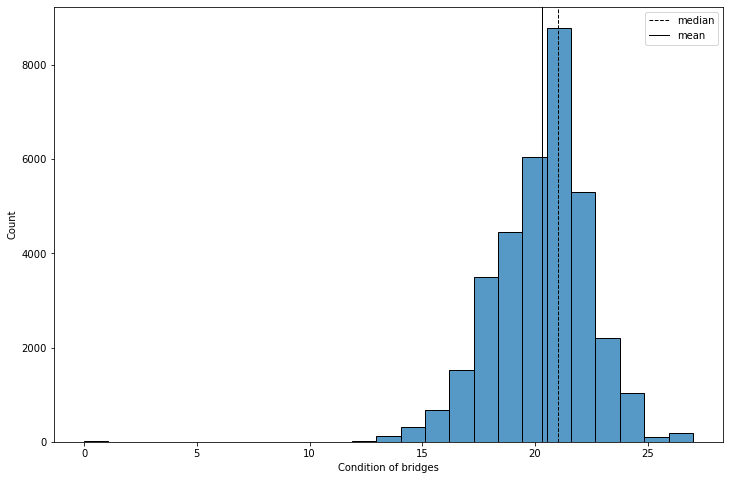

In [21]:
#plot the histogram to view the distribution of current condition of the bridges 
plt.figure(figsize = (12,8))
sns.histplot(bridges['Condition'],bins =25)
plt.axvline(bridges.Condition.median(), color='k', linestyle = 'dashed', linewidth= 1, label = 'median')
plt.axvline(bridges.Condition.mean(), color = 'k', linestyle = 'solid', linewidth = 1, label = 'mean')
plt.xlabel('Condition of bridges')
plt.ylabel('Count')
plt.legend(loc = 'upper right')
plt.show()

A vast majority of bridges seem to be at a fairly good condition with a starting range of approximately 15 to an excellent condition of over 25. The extremes on either ends may be considered as outliers, consequently, the distribution is visibly negatively skewed. The average condition (mean) of the bridges in the data provided is lesser than the 50th percentile (20.3 < 21), proving the negative skew of the distribution. 

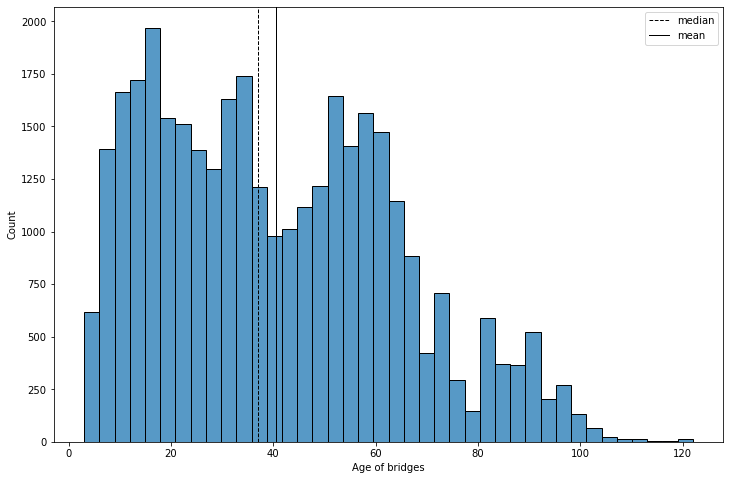

In [22]:
#plotting the distribution of age of the bridges using histogram
plt.figure(figsize = (12,8))
sns.histplot(bridges['Age'],bins =40)
plt.axvline(bridges.Age.median(), color='k', linestyle = 'dashed', linewidth= 1, label = 'median')
plt.axvline(bridges.Age.mean(), color = 'k', linestyle = 'solid', linewidth = 1, label = 'mean')
plt.xlabel('Age of bridges')
plt.ylabel('Count')
plt.legend(loc = 'upper right')
plt.show()

> This distribution implies that 50% of the bridges in the dataset are less than 40 years old while the other 50% ranges from 40 to an approximate value of 120. 

Interestingly the distribution for the age of bridges is bimodal. Although the first model consists a majority of new bridges (AGE < 40), the second mode lies between ages of 40 to 70. Multimodal data could imply ramifications in the prediction model, (i.e,) the model may react differently to this data. 
The average age of a bridge lies just over 40 and the data has a 50th percentile less than the average proving positive skew in the distribution.

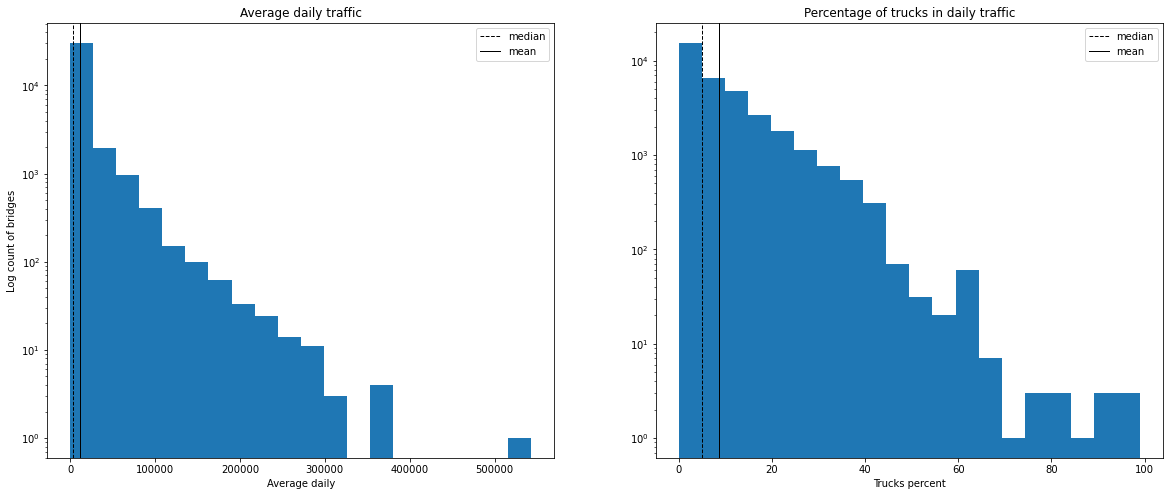

In [23]:
#plot the distribution of average daily traffic and trucks percentage 
fig,axs = plt.subplots(1,2, figsize = (20,8))
axs[0].hist(bridges['AverageDaily'], bins = 20,log = True)
axs[1].hist(bridges['Trucks_percent'], bins = 20, log = True)
axs[0].axvline(bridges.AverageDaily.median(), linewidth = 1, linestyle = 'dashed', color = 'k', label = 'median')
axs[0].axvline(bridges.AverageDaily.mean(), linewidth = 1, linestyle = 'solid', color = 'k', label = 'mean')
axs[1].axvline(bridges.Trucks_percent.median(), linewidth = 1, linestyle = 'dashed', color = 'k', label = 'median')
axs[1].axvline(bridges.Trucks_percent.mean(), linewidth = 1, linestyle = 'solid', color = 'k', label = 'mean')


_ = axs[0].set_xlabel('Average daily')
_ = axs[1].set_xlabel('Trucks percent')
_ = axs[0].set_ylabel('Log count of bridges')



axs[0].set_title('Average daily traffic')
axs[1].set_title('Percentage of trucks in daily traffic')

axs[0].legend(loc = 'upper right')
axs[1].legend(loc = 'upper right')
plt.show()

The plots are heavily skewed to the left displaying negative skew in the dataset. It is visible that the median for the average daily predictor is close to zero. This does not imply that there are bridges with very less traffic but the fact that 50% of those do not cater to a high traffic on a daily basis. 

Average traffic ('AverageDaily') on the bridges in the dataset is predominantly spread toward the left end of the plot, alongside the trucks percentage in the daily traffic. Although, the trucks percentage seems to be diversified along the x-axis showcasing a spread upto 100%. However, these could very well be special cases and cannot be considered as outliers, as mentioned previously. 

The extremeties shown on the right end in the distribution above could imply that there are bridges that support such traffic due to its structural and strength capacities. The negative skew in the predictor distribution does make realistic sense as it shows that average number of vehicles for a majority of the bridges in the dataset dominate from 0 to 20,000 approx. 

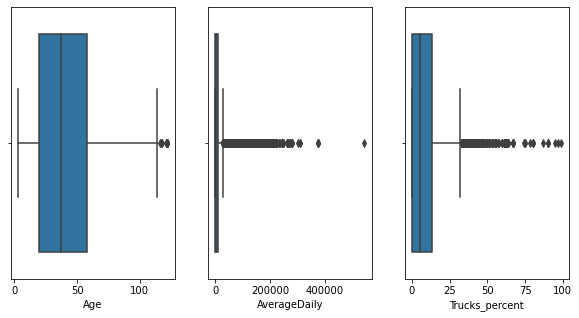

In [24]:
#visualising outliers in the dataset using boxplots
fig, axes = plt.subplots(1,3, figsize = (10,5))

sns.boxplot(ax = axes[0], x ='Age', data = bridges)
sns.boxplot(ax = axes[1], x = 'AverageDaily', data = bridges)
sns.boxplot(ax = axes[2], x ='Trucks_percent', data = bridges)
plt.show()

Since these are the 3 continuous predictor variables in the data, visualising the outliers is imperative. From the previous histograms plotted for these variables, it was evident that the data is skewed, hence paving way for the assumption of outliers. 

1. The distribution for 'age' variable is described using the interquartile range. It is visible that the whisker on the right end is the maximum with values that succeed it as outliers. 

2. Average daily traffic does display an enormous outlier distribution, however it would be misleading to consider such data as outliers since it visibly occupies a diverse range. Using the histograms above to support this analysis, these "outliers" may not be so because 50% of the average daily values are higher than its mean. It also paves way to interpretations regarding the material and design of those specific bridges to accomodate a traffic of that amount. 

3. The trucks percentage in the average daily showcases outlier cases as anything above approx.40%. As mentioned above regarding average daily, a similar assumption can be applied to the same.  

Computing the number of outliers for these 3 variables would demonstrate/support the rationality behind dropping or saving the values. 

In [25]:
#to drop outliers of age 
#calculate the quartile range 

def outlier_removal(data):
    
    '''A function to calculate the interquartile of the 
    data given as a parameter and detect the outliers using the 
    lower limit and upper limit'''
    
    Q1 = np.percentile(data, 25, interpolation = 'midpoint')
    Q2 = np.percentile(data, 50, interpolation = 'midpoint')
    Q3 = np.percentile(data, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    print("The interquartile range is : ", IQR)
    
    lower_lim = Q1- 1.5*IQR
    upper_lim = Q3+ 1.5*IQR
    print("lower limit for the age data: ", lower_lim)
    print("upper limit for the age data: ", upper_lim)
    
    #a list to append the outliers in the data
    outlier = []
    for x in data:
        if((x > upper_lim) or (x < lower_lim)):
            outlier.append(x)
    
    return outlier
 

In [26]:
       
print("Outliers for the age in the dataset: ", outlier_removal(bridges.Age))
    

The interquartile range is :  38.0
lower limit for the age data:  -37.0
upper limit for the age data:  115.0
Outliers for the age in the dataset:  [116, 122, 122, 118, 122, 122, 122, 121, 122, 122, 122, 122, 122, 122, 117, 122]


In [27]:
#REMOVING THE HISTORIC BRIDGES CONSIDERED AS OUTLIERS IN THE DATA SET
print("Number of bridges before: ", len(bridges))
bridges = bridges[~bridges['Age'].isin(outlier_removal(bridges.Age))]

print("Number of bridges after outlier removal: ", len(bridges))      

Number of bridges before:  34286
The interquartile range is :  38.0
lower limit for the age data:  -37.0
upper limit for the age data:  115.0
Number of bridges after outlier removal:  34270


In [28]:
len(outlier_removal(bridges['AverageDaily']))

The interquartile range is :  11540.0
lower limit for the age data:  -16980.0
upper limit for the age data:  29180.0


3491

In [29]:
len(outlier_removal(bridges['Trucks_percent']))

The interquartile range is :  13.0
lower limit for the age data:  -19.5
upper limit for the age data:  32.5


1296

The number of bridges detected as outliers is infinitesimal, thus, its removal is necessary and would not create a significant impact on the regression model.

While visualising the boxplots for the continuous predictor variables, 'AverageDaily' and 'Trucks_percent' have a fairly significant number of data fields considered as extremeties in the data (outlier). This may be syntactically correct, however, its semantics is not. The model interpretation would have serious ramifications if, what is approx. 15% of the data, is dropped in the name of outlier removal. 

These outliers may have valuable predictions on a bridge's current condition. 

## Part 2: Exploratory Analysis

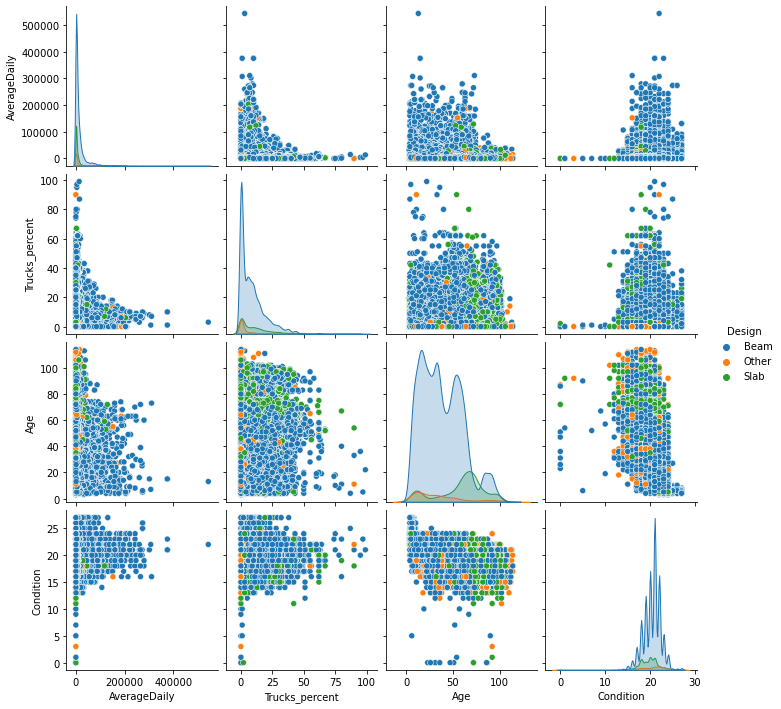

In [30]:
#Visualising the correlation of continuous predictor variables using scatter matrix 
sns.pairplot(bridges, hue = 'Design')
plt.show()

A scatterplot matrix explores the relation between the predictors and the label. Here, it is used as a measure to plot the correlation using the covariance of the continuous predictor variables and its standard deviation using the design as a categorical critera. 

- It is evident that the data points are cluttered into regions in the plot that show no or less correlation against each other. For instance, the trucks percentage scatterplot seems as though it has some correlation with the current condition but this may as well be a coincidence since it does not strongly correlate in a particular direction. 

Using a heatmap to visualise the numeric values of correlation amongst the continuous predictor variable may be preferable incomparison, to detect the collinearity and correlation nature of the variables. 


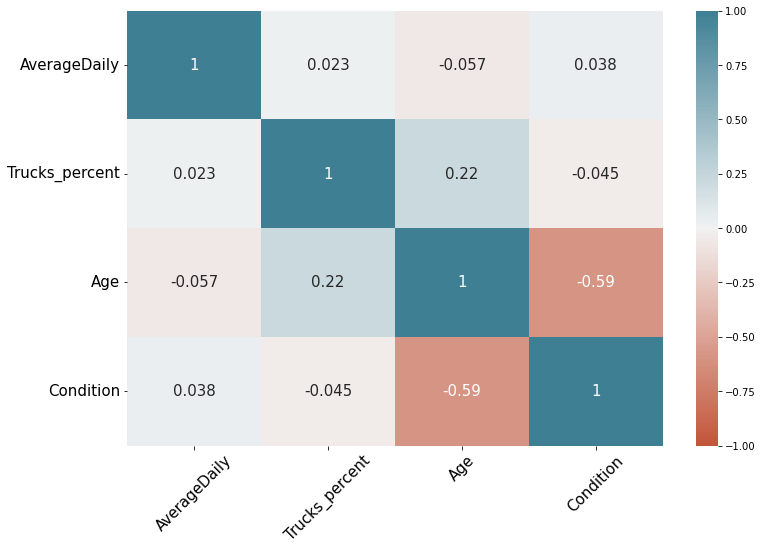

In [31]:
#using a heatmap to plot the correlation and detecting collinearity
fig,ax = plt.subplots(1,1, figsize=(12,8))
sns.heatmap(bridges.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 15})
_y = plt.yticks(rotation=0, fontsize=15)
_x = plt.xticks(rotation=45, fontsize =15)

The heatmap computes the correlation coefficient to show the correlation amidst each pair of continuous predictor variables and the label (condition). 

Analysing the variable pairs - 

- The age of the bridges seems to have a negative correlation with the condition of the bridges; implying that with increase in age the condition worsens. 
- Trucks_percent has little to no correlation with a value of -0.045 with condition of the bridges. 
- AverageDaily displays a similar result; an infinitesimal amount of 0.038 which can be approximated to no correlation. 

This heatmap enunciates on the infinitesimal correlation amongst the continuous predictor variables. As a pre-requisite to a regression model, the variables' minimal correlation may lead to better prediction with reliability. 

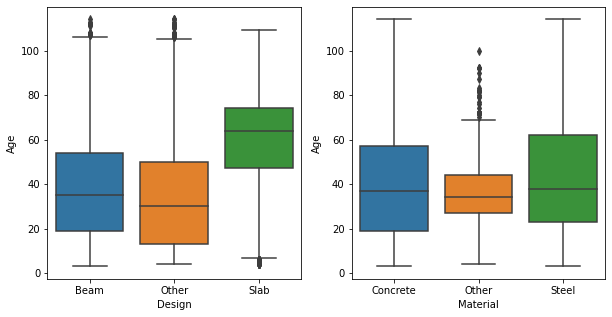

In [32]:
#comparing the categorical variable with age of the bridge
fig, (a1, a2) = plt.subplots(1,2, figsize =(10,5))
sns.boxplot(x='Design', y = 'Age', data= bridges,ax = a1 )
sns.boxplot(x= 'Material',y= 'Age', data = bridges, ax = a2)

plt.show()

#### Design: 

The median of Beam and other designs seem to have a small difference visually. While the 50th percentile for the former categories seem to have a small difference indicating these categories have design that are novel, 'Slab' is distributed with a 50th percentile above 60 years of age; implying that this design has been at use majorly in the past. The bottom whisker in the 'slab' category precedes with outliers, implying that newer bridges seldom have utilised this design. Hence, the outliers.   

#### Material:
The median of all the materials hovers around the age 40. Furthermore, the 2 out of 3 material types have been used for almost a over 110 years. Steel and concrete have a rather very similar distribution while materials in the 'other' category have been majorly short-lived with its upper limit upto approx. 70 years, while there are outliers that seem to have had the ability to withstand. 

The category 'Other' shows that not many of those materials are needed in this day and time, hence displaying that the number of bridges with any other material are far lesser as opposed to concrete and steel. From this observation it also points to the fact that concrete and steel have the ability to withstand for longer. 

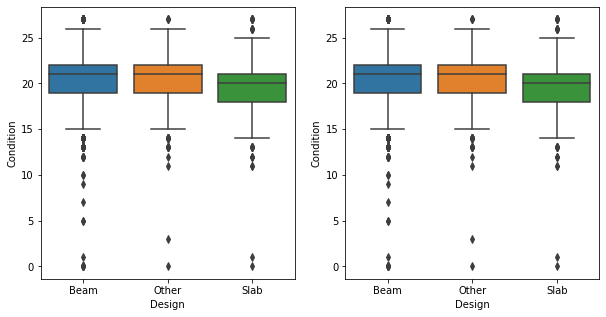

In [33]:
fig, (a1, a2) = plt.subplots(1,2, figsize =(10,5))
sns.boxplot(x='Design', y = 'Condition', data= bridges, ax = a1)
sns.boxplot(x='Design', y = 'Condition', data= bridges, ax = a2)
plt.show()

To consider the association amidst the condition of the bridges with the categorical predictor variables, it is evident that the categories overlap. Although there is not an absolute overlap, this does imply that the categorical variables have an infinitesimal association to the condition of the bridge. 

Moreover, using the distribution (histogram) for the 'condition'  to support this analysis, the boxplots display a significant skew toward a range of 15 to over 25. It is evident that the lower limit for the categories show that almost a 100% of the bridges have a condition above 15. 

In [34]:
sample = bridges.sample(frac = 0.01)

<AxesSubplot:xlabel='Age', ylabel='AverageDaily'>

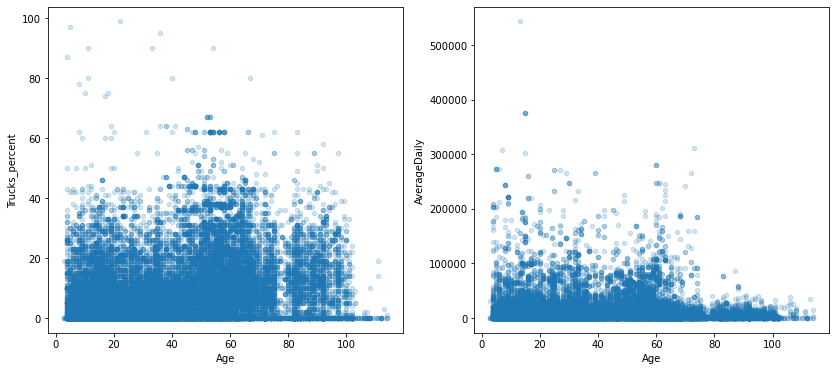

In [35]:
#comparing the continuous predictors to each other using scatterplot
fig,(a1, a2) = plt.subplots(1, 2, figsize =(14,6))
bridges.plot(kind = "scatter",x = 'Age', y ='Trucks_percent', ax = a1, alpha = 0.2)
bridges.plot(kind = "scatter",axes = a2, x='Age',y= 'AverageDaily',ax = a2, alpha = 0.2)

Although the correlation of amongst the continuous predictors has been plotted, visualising its distribution using a scatterplot gives an foundation to the claim. 

As the age of the bridges increases, this plot does not exactly exhibit explicit correlation as expected. Its evidence is a percentage of trucks over 40% as a part of the daily traffic for a vast majority of the bridges. The data is dense and does not seem to show a specific relationship/association as expected from the previous analysis. 

## Part 3: Regression Modelling

In [36]:
#Import necessary sklearn modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

Since regression is done on the basis of a numeric perspective, categorical variables must be converted to numerics to perform the same. This can be done with the help of a pandas method; get_dummies(). 
The get_dummies() method converts the categories in focus to boolean values. Here, materials and design have 3 categories each. 

In [37]:
#get_dummies for categorical variables
#this is done to make these predictors suitable for regression
#get_dummies on material
bridges_m = pd.get_dummies(bridges.Material, drop_first = True)
bridges_m.head()

,Other,Steel
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0


In [38]:
#get_dummies on design
bridges_d = pd.get_dummies(bridges.Design, drop_first = True)
bridges_d.head()                           

,Other,Slab
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


The first column plays the role of a placeholder- a criteria for comparison for the other categories. For instance, the Beam design acts as the comparison factor and 'Concrete' as the comparison for materials.

In [39]:
#splitting the data into predictors and label 
X = np.column_stack((bridges.AverageDaily, bridges.Trucks_percent, bridges.Age, bridges_m.Other, 
                     bridges_m.Steel, bridges_d.Other, bridges_d.Slab))
y= bridges.Condition

In [40]:
#fitting the predictors and label in the linear regression model

reg = LinearRegression().fit(X,y)

In [41]:
coeff_parameters= pd.DataFrame(reg.coef_).T
coeff_parameters.columns = ['AverageDaily','Trucks_percent', 'Age', 'Material_other','Material_steel', 'Design_other', 'Design_slab']
coeff_parameters

,AverageDaily,Trucks_percent,Age,Material_other,Material_steel,Design_other,Design_slab
0,-7.052547e-07,0.005088,-0.048586,-2.907317,-1.377565,0.118376,-0.076092


The coefficients computed for the regression analysis display quite an interesting result. Since the predictors have categorical variables as well, the categorical coefficients are compared to the indicator variables; the variables dropped while using the get_dummies() method. 

#### Material: 
- Material_other - the coefficient showcases that any material in the 'Other' category performs worse by 2.908 times than concrete (indicator). 
- Material_steel- although this coefficient indicates that it performs relatively better than any 'other' material, its ability does not outweigh concrete with a value of -1.377. 

#### Design:
- Design_other - the coefficient for 'other' designs show a miniscule improvement of 0.118376 in comparison to its indicator variable; beam. Although it is not significantly better, it does generate a posibility of providing an improvement than a bridge with a beam design. 

- Design_slab - this coefficient performs worse than beam by 0.076092. As mentioned about 'other' designs, this has a value that may not be significant enough to decide a design's ability, however, syntactically it is predicted to be an under-performer out of the 3. 

In [42]:
#assigning the beta_coefficient values to the variables 
beta_averagedaily, beta_trucks, beta_age = reg.coef_[0:3]

#### Comparing the coefficients 

In [43]:
average_daily_range = bridges.AverageDaily.quantile(0.9)- bridges.AverageDaily.quantile(0.1)
age_range = bridges.Age.quantile(0.9) - bridges.Age.quantile(0.1)
trucks_percent_range = bridges.Trucks_percent.quantile(0.9) - bridges.Trucks_percent.quantile(0.1)
condition_range = bridges.Condition.quantile(0.9) - bridges.Condition.quantile(0.1)

print('average daily range (10th to 90th centile) is %3.1f' % average_daily_range, 'daily')
print('age range (10th to 90th centile) is %3.1f' % age_range, 'years')
print('trucks percentage of daily traffic range (10th to 90th centile) is %3.1f' % trucks_percent_range, 'percentage')
print('Change in condition of the bridge range (10th to 90th percentile) is %3.1f' % condition_range, 'ratings')

average daily range (10th to 90th centile) is 29560.0 daily
age range (10th to 90th centile) is 61.0 years
trucks percentage of daily traffic range (10th to 90th centile) is 23.0 percentage
Change in condition of the bridge range (10th to 90th percentile) is 5.0 ratings


In [44]:
print ('The change in condition of bridge (as a percent of its range) given by average daily its coefficient is %4.1f percent'
       % (100 * (beta_averagedaily * average_daily_range) / condition_range))

print ('The change in condition of the bridge (as a percent of its range) given by trucks percentage and its coefficient is %4.1f percent'
      % (100 * (beta_trucks * trucks_percent_range) / condition_range))

print ('The change in condition (as a percent of its range) given by age and its coefficient is %4.1f percent'
      % (100 * (beta_age * age_range) / condition_range))

The change in condition of bridge (as a percent of its range) given by average daily its coefficient is -0.4 percent
The change in condition of the bridge (as a percent of its range) given by trucks percentage and its coefficient is  2.3 percent
The change in condition (as a percent of its range) given by age and its coefficient is -59.3 percent


The continuous predictor variables are compared as a percentage change in condition using the regression coefficients. The computed values show the following: 

1. The change in condition of the bridges given by the average daily traffic is a -0.4 percent. This indicates that the range of traffic on these bridges (given by this prediction) reduces its condition by 0.4 percent. 
2. The change in condition of the bridges given by the percentage of trucks is 2.3 percent. Although this shows an improvement in the condition of a bridge, this is not an expected result. 
3. The change in condition given by age indicates that this has a deteriorating affect on the condition of the bridges by 59.3% every year. 

#### Prediction and Error distribution

In [45]:
#computing the R2 coefficient of determination
print(f'The R2 coefficient for the linear regression model is: {reg.score(X,y)}')
      

The R2 coefficient for the linear regression model is: 0.4532142248041957


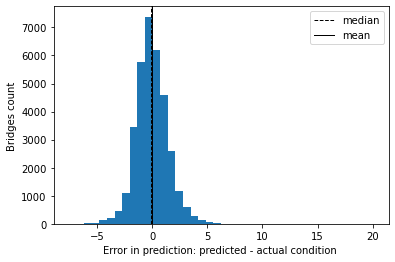

In [46]:
y_pred = reg.predict(X)

fig,a1 = plt.subplots(1,1)
residual = y_pred - y
a1.hist(residual, bins=40)
a1.axvline(residual.median(),label = 'median', linestyle = 'dashed',linewidth = 1, color = 'k')
a1.axvline(residual.mean(),label = 'mean', linestyle = 'solid', linewidth = 1, color = 'k')

plt.legend(loc = 'upper right')
_ = a1.set_xlabel('Error in prediction: predicted - actual condition ')
_ = a1.set_ylabel('Bridges count')

Text(0, 0.5, 'Actual Value')

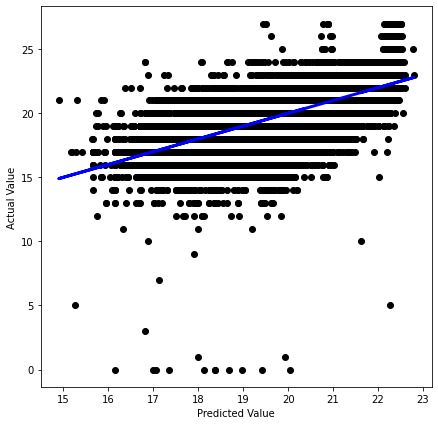

In [47]:
# Plot outputs
fig, a = plt.subplots(1,1,figsize=(7,7))
a.scatter(y_pred, y,  color='black')
a.plot(y_pred, y_pred, color='blue', linewidth=3)


a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

## Conclusion

The R2 score; also known as the coefficient of determination usually ranges from 0 to 1. Here, the score is computed to be 0.452 approximately. An R2 score of this value is not very good. This also implies that the data may be underfitting and the predictor variables used are not enough; implying that there are better predictors we need for a better prediction. 
The R2 value computed shows that only 50% of variability in data is explained by the regression model. However, this score does not necessarily prove that the model is entirely discreditable. There may be underlying factors in the data and variable units.  

The residual histogram illustrates the error in prediction for the count of bridges in the dataset. As we already know that the R2 coefficient is not up to what one might define as a good score, this residual plot displays a peak for values close to 0, implying that 50% of the predictions have an error by an infinitesimal amount. Moreover, by marking the median and average error for the residual plot, we can see that these summary statistics have overlapped, showcasing a rather normal distribution. 

Therefore, this regression model is inherently not disagreeable, however, improving the number of predictor variables can possibly enhance its performance and reduce the residual count to a minimal. 